# $$Credit EDA & Credit Score Calculation with Python$$
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details andextensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncovermeaningful patterns, anomalies, and insights within the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown 1mFlx9Y0lPFfNgXOP6BNivUz_TJJCQDFv

Downloading...
From: https://drive.google.com/uc?id=1mFlx9Y0lPFfNgXOP6BNivUz_TJJCQDFv
To: /content/Credit_score.csv
100% 27.4M/27.4M [00:00<00:00, 65.6MB/s]


In [3]:
data = pd.read_csv('Credit_score.csv')

<ipython-input-3-42a8ab7aaae7>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Credit_score.csv')


In [5]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

In [7]:
data[['Customer_ID','Age']]

,Customer_ID,Age
0,CUS_0xd40,23
1,CUS_0xd40,23
2,CUS_0xd40,-500
3,CUS_0xd40,23
4,CUS_0xd40,23
...,...,...
99995,CUS_0x942c,25
99996,CUS_0x942c,25
99997,CUS_0x942c,25
99998,CUS_0x942c,25


In [8]:
data[data['Age'].str[-1]=="_"]['Age']

8          28_
54         34_
58         30_
71         24_
89         33_
         ...  
99908    4808_
99922      38_
99933      38_
99942      48_
99987      28_
Name: Age, Length: 4939, dtype: object

In [9]:
data.loc[data['Age'].str[-1] =='_','Age'] = data['Age'].str[:-1]
data.loc[data['Age'].str[0] =='-','Age'] = data['Age'].str[1:]
data['Age']

0         23
1         23
2        500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: object

In [10]:
data['Age'] = data['Age'].astype(int)
data['Age']

0         23
1         23
2        500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

Referencing the maximum age of a person in th world as 122 then using this fi ltering out the outliers in it.

In [11]:
data.loc[data['Age']>122,'Age'].count()

2770

there are 2770 entries where age are more than 122 years so to deal with these wrong entries we will use mode of age for every customer_IDand replace these wrong entries with mode of it

In [13]:
data['Age']= data.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0])
data['Age']

0        23
1        23
2        23
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64

In [14]:
data.loc[data['Age']> 122,'Age'].count()

0

In [15]:
data['Age'].unique()

array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 41,
       32, 48, 43, 36, 16, 18, 42, 22, 19, 15, 27, 38, 14, 25, 45, 47, 17,
       53, 24, 54, 29, 49, 51, 50, 52, 56])

In [16]:
data[['Customer_ID','Age']]

,Customer_ID,Age
0,CUS_0xd40,23
1,CUS_0xd40,23
2,CUS_0xd40,23
3,CUS_0xd40,23
4,CUS_0xd40,23
...,...,...
99995,CUS_0x942c,25
99996,CUS_0x942c,25
99997,CUS_0x942c,25
99998,CUS_0x942c,25


##Dealing with missing value of Names and Monthly_Inhand_Salary in given data wecan use mode of name for every customer_id which will replace the null value in it.

#For Name

In [20]:
data['Name']= data.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.mode()[0])
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
5,0x1607,CUS_0xd40,June,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118
6,0x1608,CUS_0xd40,July,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167
7,0x1609,CUS_0xd40,August,1824.843333,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676
8,0x160e,CUS_0x21b1,January,3037.986667,28,004-07-5839,_______,34847.84,3037.986667,2,...,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269
9,0x160f,CUS_0x21b1,February,3037.986667,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.5912143


##For Monthly_Inhand_Salary

In [18]:
data['Monthly_Inhand_Salary']= data.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.mode()[0])
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.5912143


In [21]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

SSN also have some discripancy in its value so we can treat it using mode replacement

In [22]:
data['SSN']= data.groupby('Customer_ID')['SSN'].transform(lambda x: x.mode()[0])

Now Treating Type of Loan which have 11408 null values

In [23]:
data[['Customer_ID','Name','Month','Type_of_Loan']].head(45)

,Customer_ID,Name,Month,Type_of_Loan
0,CUS_0xd40,1824.843333,January,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,CUS_0xd40,1824.843333,February,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,CUS_0xd40,1824.843333,March,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,CUS_0xd40,1824.843333,April,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,CUS_0xd40,1824.843333,May,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
5,CUS_0xd40,1824.843333,June,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
6,CUS_0xd40,1824.843333,July,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
7,CUS_0xd40,1824.843333,August,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
8,CUS_0x21b1,3037.986667,January,Credit-Builder Loan
9,CUS_0x21b1,3037.986667,February,Credit-Builder Loan


In [24]:
data.groupby(['Customer_ID','Name'])['Type_of_Loan'].apply(lambda x: x.isnull().all()).sum()

1426

from above we can see there are 1426 Customers who have no entry for their loan type so we can't do anything for these entry and leave it as itis but we can replace it with entries which are not null

In [25]:
data['Type_of_Loan']= data.groupby('Customer_ID')['Type_of_Loan'].transform(lambda x: x.fillna(x.mode().str[0]))

In [26]:
data.groupby(['Customer_ID','Name'])['Type_of_Loan']

In [27]:
data.Customer_ID.nunique()

12500

In [28]:
data['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

for dealing with "_" we should do below steps

In [29]:
data.loc[data['Num_of_Delayed_Payment'].str[-1] =='_','Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str[:-1]

for dealing with "-" or negative numbers as average number of payments delayed by a person so it can't be a negative number we will do belowsteps

In [30]:
data.loc[data['Num_of_Delayed_Payment'].str[0] == '-','Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str[1:]

In [31]:
data['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8', '6', '1', '3', '0', '5', '9', '12', '15', '17',
       '10', '2', '11', '14', '20', '22', '13', '16', '18', '19', '23',
       '24', '21', '3318', '3083', '1338', '26', '3104', '25', '183',
       '1106', '834', '2672', '2008', '538', '27', '3478', '2420', '707',
       '708', '3815', '28', '1867', '2250', '1463', '4126', '2882',
       '1941', '2655', '2628', '132', '3069', '306', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '3764', '851', '3905',
       '923', '88', '1668', '3253', '808', '2689', '3858', '642', '3457',
       '1402', '1732', '3154', '847', '3037', '2204', '3103', '1063',
       '2056', '1282', '1841', '2569', '211', '793', '3484', '411',
       '3491', '2072', '3050', '1049', '2162', '3402', '2753', '1718',
       '1014', '3260', '3855', '84', '2311', '3251', '1832', '4069',
       '3010', '733', '4241', '166', '2461', '1749', '3200', '663',
       

In [32]:
data['Num_of_Delayed_Payment'].isna().sum()

7002

In [33]:
data[['Customer_ID','Num_of_Delayed_Payment']].head(30)

,Customer_ID,Num_of_Delayed_Payment
0,CUS_0xd40,7
1,CUS_0xd40,NaN
2,CUS_0xd40,7
3,CUS_0xd40,4
4,CUS_0xd40,NaN
5,CUS_0xd40,4
6,CUS_0xd40,8
7,CUS_0xd40,6
8,CUS_0x21b1,4
9,CUS_0x21b1,1


In [34]:
data['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8', '6', '1', '3', '0', '5', '9', '12', '15', '17',
       '10', '2', '11', '14', '20', '22', '13', '16', '18', '19', '23',
       '24', '21', '3318', '3083', '1338', '26', '3104', '25', '183',
       '1106', '834', '2672', '2008', '538', '27', '3478', '2420', '707',
       '708', '3815', '28', '1867', '2250', '1463', '4126', '2882',
       '1941', '2655', '2628', '132', '3069', '306', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '3764', '851', '3905',
       '923', '88', '1668', '3253', '808', '2689', '3858', '642', '3457',
       '1402', '1732', '3154', '847', '3037', '2204', '3103', '1063',
       '2056', '1282', '1841', '2569', '211', '793', '3484', '411',
       '3491', '2072', '3050', '1049', '2162', '3402', '2753', '1718',
       '1014', '3260', '3855', '84', '2311', '3251', '1832', '4069',
       '3010', '733', '4241', '166', '2461', '1749', '3200', '663',
       

In [35]:
data['Num_of_Delayed_Payment']
data['Num_of_Delayed_Payment'] = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [36]:
data['Num_of_Delayed_Payment'].isna().sum()

0

In [37]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

#Num_Credit_Inquiries

now dealing with
Num_Credit_Inquiries which Represents the number of credit card inquiries
Num_Credit_Inquiries 1965

#Credit History Age

In [38]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

In [39]:
data[['Customer_ID','Month','Name','Occupation','Annual_Income','Num_Credit_Card','Credit_History_Age']].head(25)

,Customer_ID,Month,Name,Occupation,Annual_Income,Num_Credit_Card,Credit_History_Age
0,CUS_0xd40,January,1824.843333,Scientist,19114.12,4,22 Years and 1 Months
1,CUS_0xd40,February,1824.843333,Scientist,19114.12,4,NaN
2,CUS_0xd40,March,1824.843333,Scientist,19114.12,4,22 Years and 3 Months
3,CUS_0xd40,April,1824.843333,Scientist,19114.12,4,22 Years and 4 Months
4,CUS_0xd40,May,1824.843333,Scientist,19114.12,4,22 Years and 5 Months
5,CUS_0xd40,June,1824.843333,Scientist,19114.12,4,22 Years and 6 Months
6,CUS_0xd40,July,1824.843333,Scientist,19114.12,4,22 Years and 7 Months
7,CUS_0xd40,August,1824.843333,Scientist,19114.12,4,NaN
8,CUS_0x21b1,January,3037.986667,_______,34847.84,4,26 Years and 7 Months
9,CUS_0x21b1,February,3037.986667,Teacher,34847.84,4,26 Years and 8 Months


In [40]:
data['Credit_History_Age'].str.split(" ").str[-2]

0          1
1        NaN
2          3
3          4
4          5
        ... 
99995      6
99996      7
99997      8
99998      9
99999     10
Name: Credit_History_Age, Length: 100000, dtype: object

#Amount Invested Montly

In [42]:
data[['Customer_ID','Month','Name','Occupation','Annual_Income','Num_Credit_Card','Amount_invested_monthly']].head(25)

,Customer_ID,Month,Name,Occupation,Annual_Income,Num_Credit_Card,Amount_invested_monthly
0,CUS_0xd40,January,1824.843333,Scientist,19114.12,4,80.41529544
1,CUS_0xd40,February,1824.843333,Scientist,19114.12,4,118.2802216
2,CUS_0xd40,March,1824.843333,Scientist,19114.12,4,81.69952126
3,CUS_0xd40,April,1824.843333,Scientist,19114.12,4,199.4580744
4,CUS_0xd40,May,1824.843333,Scientist,19114.12,4,41.42015309
5,CUS_0xd40,June,1824.843333,Scientist,19114.12,4,62.43017233
6,CUS_0xd40,July,1824.843333,Scientist,19114.12,4,178.3440674
7,CUS_0xd40,August,1824.843333,Scientist,19114.12,4,24.78521651
8,CUS_0x21b1,January,3037.986667,_______,34847.84,4,104.2918252
9,CUS_0x21b1,February,3037.986667,Teacher,34847.84,4,40.39123783


In [43]:
data['Amount_invested_monthly'].isna().sum()

4479

In [44]:
data[['Customer_ID','Month','Amount_invested_monthly']].head(30)

,Customer_ID,Month,Amount_invested_monthly
0,CUS_0xd40,January,80.41529544
1,CUS_0xd40,February,118.2802216
2,CUS_0xd40,March,81.69952126
3,CUS_0xd40,April,199.4580744
4,CUS_0xd40,May,41.42015309
5,CUS_0xd40,June,62.43017233
6,CUS_0xd40,July,178.3440674
7,CUS_0xd40,August,24.78521651
8,CUS_0x21b1,January,104.2918252
9,CUS_0x21b1,February,40.39123783


In [45]:
data[data['Amount_invested_monthly'] =='__10000__']['Amount_invested_monthly'].shape

(4305,)

In [46]:
data['Amount_invested_monthly'].describe()

count         95521
unique        91049
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object

there are null 4479 null values and 4305 wrong entries in the 'Amount_invested_monthly' column so we have to deal with it seperately using .fillna() and .replace() and both of these would be replaced 1st with -1 then its type should get converted to fl oat or int then -1 is replaced withmedian as this would be better choice keeping in mind with the outliers and width of entries numeric values for the given data

In [47]:
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna("-1"))
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.replace("__10000__","-1"))

In [48]:
data[['Customer_ID','Month','Amount_invested_monthly']].head(30)

,Customer_ID,Month,Amount_invested_monthly
0,CUS_0xd40,January,80.41529544
1,CUS_0xd40,February,118.2802216
2,CUS_0xd40,March,81.69952126
3,CUS_0xd40,April,199.4580744
4,CUS_0xd40,May,41.42015309
5,CUS_0xd40,June,62.43017233
6,CUS_0xd40,July,178.3440674
7,CUS_0xd40,August,24.78521651
8,CUS_0x21b1,January,104.2918252
9,CUS_0x21b1,February,40.39123783


In [49]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(float)

Now replacing -1 with the median value of 'Amount_invested_monthly'for same Customer_ID

In [50]:
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.replace(-1,x.median()))

In [51]:
data[['Customer_ID','Month','Amount_invested_monthly']].head(30)

,Customer_ID,Month,Amount_invested_monthly
0,CUS_0xd40,January,80.415295
1,CUS_0xd40,February,118.280222
2,CUS_0xd40,March,81.699521
3,CUS_0xd40,April,199.458074
4,CUS_0xd40,May,41.420153
5,CUS_0xd40,June,62.430172
6,CUS_0xd40,July,178.344067
7,CUS_0xd40,August,24.785217
8,CUS_0x21b1,January,104.291825
9,CUS_0x21b1,February,40.391238


Now all null values and wrong entries has been replaced with median value of Amount_invested_monthly for same Customer_ID as can becheck by below process

In [52]:
print("number of null values : ",data['Amount_invested_monthly'].isna().sum())
print("number of wrong entries __10000__ : ",data[data['Amount_invested_monthly']=='__10000__']['Amount_invested_monthly'].count())

number of null values :  0
number of wrong entries __10000__ :  0


##Monthly Balance

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  float64
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [54]:
data[data.Monthly_Balance.isna()][['Customer_ID','Month','Monthly_Balance']]

,Customer_ID,Month,Monthly_Balance
197,CUS_0xa5f9,June,NaN
314,CUS_0x571f,March,NaN
388,CUS_0x9b3c,May,NaN
456,CUS_0x9d78,January,NaN
457,CUS_0x9d78,February,NaN
...,...,...,...
99820,CUS_0x40ad,May,NaN
99839,CUS_0x8788,August,NaN
99852,CUS_0x3048,May,NaN
99854,CUS_0x3048,July,NaN


In [55]:
data[['Customer_ID','Monthly_Balance']].iloc[450:470]

,Customer_ID,Monthly_Balance
450,CUS_0x3f5b,407.5699589
451,CUS_0x3f5b,803.4807269
452,CUS_0x3f5b,625.2923728
453,CUS_0x3f5b,708.5727909
454,CUS_0x3f5b,799.4042336
455,CUS_0x3f5b,808.782961
456,CUS_0x9d78,NaN
457,CUS_0x9d78,NaN
458,CUS_0x9d78,214.1906424
459,CUS_0x9d78,141.3300654


inorder to deal with missing value we will use mean value of Monthly_Balance for every Customer_ID

since monthly_balance is string data type so fi rst we will replace null value with 0 for identifi cation then will change the datatype from str tofl oat if some miscellaneous no numeric entity comes up while performing operation e.g.
-333333333333333333333333333
then will replacesame with 0 then again will replace 0 with the mean of monthly_balance for every customer_ID

In [56]:
data['Monthly_Balance'] = data.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna("0"))
data['Monthly_Balance'] = data.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.replace("__-333333333333333333333333333__","0"))
data['Monthly_Balance'] = data['Monthly_Balance'].astype(float)
data['Monthly_Balance'] = data.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.replace(0,x.mean()))

cross checking the missing value imputation

In [57]:
data[['Customer_ID','Monthly_Balance']].iloc[450:470]

,Customer_ID,Monthly_Balance
450,CUS_0x3f5b,407.569959
451,CUS_0x3f5b,803.480727
452,CUS_0x3f5b,625.292373
453,CUS_0x3f5b,708.572791
454,CUS_0x3f5b,799.404234
455,CUS_0x3f5b,808.782961
456,CUS_0x9d78,80.596508
457,CUS_0x9d78,80.596508
458,CUS_0x9d78,214.190642
459,CUS_0x9d78,141.330065


In [58]:
data[['Customer_ID','Monthly_Balance']].iloc[99845:99860]

,Customer_ID,Monthly_Balance
99845,CUS_0x944e,302.276968
99846,CUS_0x944e,284.018644
99847,CUS_0x944e,299.233745
99848,CUS_0x3048,381.241606
99849,CUS_0x3048,41.541911
99850,CUS_0x3048,243.341772
99851,CUS_0x3048,380.229816
99852,CUS_0x3048,187.515825
99853,CUS_0x3048,258.156482
99854,CUS_0x3048,187.515825


In [59]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

##Now its time to check every features in data for some wrong entries or changing its data type ifrequired

In [60]:
data.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [61]:
data.Name.unique()

array([ 1824.843333,  3037.986667, 12187.22    , ...,  3097.008333,
        1929.906667,  3359.415833])

In [62]:
data.Name.nunique()

12489

In [64]:
np.dtype(data.Age)

dtype('int64')

In [65]:
data.Age.unique()

array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 41,
       32, 48, 43, 36, 16, 18, 42, 22, 19, 15, 27, 38, 14, 25, 45, 47, 17,
       53, 24, 54, 29, 49, 51, 50, 52, 56])

In [67]:
data.SSN.unique()

array(['821-00-0265', '004-07-5839', '486-85-3974', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [68]:
data.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

for Occupation column there is wrong etry we can see from above unique element so in order to deal with this we will use mode of occupationcolumn for every Customer_ID

In [69]:
data[['Customer_ID','Name','Occupation']].head(50)

,Customer_ID,Name,Occupation
0,CUS_0xd40,1824.843333,Scientist
1,CUS_0xd40,1824.843333,Scientist
2,CUS_0xd40,1824.843333,Scientist
3,CUS_0xd40,1824.843333,Scientist
4,CUS_0xd40,1824.843333,Scientist
5,CUS_0xd40,1824.843333,Scientist
6,CUS_0xd40,1824.843333,Scientist
7,CUS_0xd40,1824.843333,Scientist
8,CUS_0x21b1,3037.986667,_______
9,CUS_0x21b1,3037.986667,Teacher


In [70]:
data['Occupation'] = data.groupby('Customer_ID')['Occupation'].transform(lambda x: x.replace("_______",x.mode().iloc[0]))

In [71]:
data[['Customer_ID','Name','Occupation']].head(50)

,Customer_ID,Name,Occupation
0,CUS_0xd40,1824.843333,Scientist
1,CUS_0xd40,1824.843333,Scientist
2,CUS_0xd40,1824.843333,Scientist
3,CUS_0xd40,1824.843333,Scientist
4,CUS_0xd40,1824.843333,Scientist
5,CUS_0xd40,1824.843333,Scientist
6,CUS_0xd40,1824.843333,Scientist
7,CUS_0xd40,1824.843333,Scientist
8,CUS_0x21b1,3037.986667,Teacher
9,CUS_0x21b1,3037.986667,Teacher


from above process "___" is replaced with the mode of Occupation column for every Customer_ID

#Annual Income

In [72]:
data.Annual_Income.isna().sum()

0

In [73]:
data.Annual_Income.loc[25:50]

25     30689.89
26     30689.89
27    30689.89_
28     30689.89
29     30689.89
30     30689.89
31     30689.89
32    35547.71_
33     35547.71
34     35547.71
35     35547.71
36     35547.71
37     35547.71
38     35547.71
39     35547.71
40     73928.46
41     73928.46
42     73928.46
43     73928.46
44     73928.46
45     73928.46
46     73928.46
47     73928.46
48     131313.4
49     131313.4
50     131313.4
Name: Annual_Income, dtype: object

In [74]:
data.Annual_Income.unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

since there are annual incomes where the we can see froma bove result that the they are in string format as because they are in this format34847.84_ or 39628.99_ so inorder to deal with this we can do the process as shown below

In [75]:
data.loc[data['Annual_Income'].str[-1] =='_','Annual_Income'] = data['Annual_Income'].str[:-1]
data.Annual_Income = data.Annual_Income.astype(float)
data.Annual_Income.unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

#Monthly_Inhand_Salary

In [76]:
data.Monthly_Inhand_Salary.unique()

array([ 1824.843333,  3037.986667, 12187.22    , ...,  3097.008333,
        1929.906667,  3359.415833])

#Num_Bank_Accounts:

Represents the number of bank accounts a person holds

In [77]:
data.Num_Bank_Accounts.unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

from the above inquiry we can se it is not right to say that a person have number of bank accounts more than 1000 or more than double digitsso we can conclude them as wrong entry, so to deal with it we can use mode operation

In [78]:
data[data['Num_Bank_Accounts'] >1000][['Customer_ID','Num_Bank_Accounts']]

,Customer_ID,Num_Bank_Accounts
267,CUS_0x4004,1414
288,CUS_0x4080,1231
356,CUS_0xaedb,1488
1057,CUS_0x1e9b,1647
1122,CUS_0x6749,1696
...,...,...
98735,CUS_0xdcc,1083
98749,CUS_0x50c4,1617
98796,CUS_0xa756,1511
99417,CUS_0xdfd,1525


In [79]:
data.Num_Bank_Accounts.iloc[264:273]

264       8
265       8
266       8
267    1414
268       8
269       8
270       8
271       8
272       2
Name: Num_Bank_Accounts, dtype: int64

In [80]:
data['Num_Bank_Accounts'] = data.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.mode().iloc[0])

In [81]:
data.Num_Bank_Accounts.unique()

array([ 3,  2,  1,  7,  4,  0,  8,  5,  6,  9, 10, -1])

since all Num_Bank_Accounts comes in single digits which sounds good but still there is negative value which needed to be treated seperately as shown below

In [82]:
data[data['Num_Bank_Accounts']==-1][['Customer_ID','Num_Bank_Accounts']]

,Customer_ID,Num_Bank_Accounts
30328,CUS_0x4f2a,-1
30329,CUS_0x4f2a,-1
30330,CUS_0x4f2a,-1
30331,CUS_0x4f2a,-1
30332,CUS_0x4f2a,-1
30333,CUS_0x4f2a,-1
30334,CUS_0x4f2a,-1
30335,CUS_0x4f2a,-1
43688,CUS_0xa878,-1
43689,CUS_0xa878,-1


From above observation we can say that mostly the customers which have 'Num_Bank_Accounts' as -1 they have all their entries as -1 for'Num_Bank_Accounts' so inorder to deal with it we have to consider some other columns lets say some demographic characters like Age ,Occupation and using similar in these beahviour their 'Num_Bank_Accounts' to impute this -1 value in 'Num_Bank_Accounts'

In [83]:
data[['Customer_ID','Num_Bank_Accounts']][30325:30340]

,Customer_ID,Num_Bank_Accounts
30325,CUS_0x510d,7
30326,CUS_0x510d,7
30327,CUS_0x510d,7
30328,CUS_0x4f2a,-1
30329,CUS_0x4f2a,-1
30330,CUS_0x4f2a,-1
30331,CUS_0x4f2a,-1
30332,CUS_0x4f2a,-1
30333,CUS_0x4f2a,-1
30334,CUS_0x4f2a,-1


In [84]:
data['Num_Bank_Accounts'] = data.groupby(['Age','Occupation'])['Num_Bank_Accounts'].transform(lambda x: x.replace(-1,x.mode().iloc[0]))

In [85]:
data[['Customer_ID','Num_Bank_Accounts']][30325:30340]

,Customer_ID,Num_Bank_Accounts
30325,CUS_0x510d,7
30326,CUS_0x510d,7
30327,CUS_0x510d,7
30328,CUS_0x4f2a,3
30329,CUS_0x4f2a,3
30330,CUS_0x4f2a,3
30331,CUS_0x4f2a,3
30332,CUS_0x4f2a,3
30333,CUS_0x4f2a,3
30334,CUS_0x4f2a,3


since still -1 is left so for that we can us mode of 'Num_Bank_Accounts' for every 'Customer_ID'

In [86]:
data['Num_Bank_Accounts'] = data.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.replace(-1,x.mode().iloc[0]))

In [87]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

#Num_Credit_Card

In [88]:
data.Num_Credit_Card.unique()

array([   4, 1385,    5, ...,  955, 1430,  679])

from above observation we can see there are individuals who owns more than 1000 credit cards which are not possible legally so thisNum_Credit_Card column should be treated accordingly as shown below

In [89]:
data[data['Num_Credit_Card'] >1000][['Customer_ID','Num_Credit_Card']].shape[0]

774

In [90]:
data['Num_Credit_Card'] = data.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x: x.mode().iloc[0])

In [91]:
data.Num_Credit_Card.unique()

array([ 4,  5,  1,  7,  6,  8,  3,  9,  2, 10, 11,  0])

In [92]:
data[data['Num_Credit_Card'] >1000][['Customer_ID','Num_Credit_Card']].shape[0]

0

Now from above process the wrong entries for Num_Credit_Card where Num_Credit_Card > 1000 has been treated

#Interest_Rate

In [93]:
data.Interest_Rate.unique()

array([   3,    6,    8, ..., 1347,  387, 5729])

In [94]:
data[data['Interest_Rate'] > 1000 ][['Customer_ID','Interest_Rate']]

,Customer_ID,Interest_Rate
44,CUS_0x95ee,5318
167,CUS_0x132f,5240
178,CUS_0xac86,4975
345,CUS_0xc65,1138
472,CUS_0x8f17,5261
...,...,...
99621,CUS_0xae66,2536
99753,CUS_0x4a8f,1127
99791,CUS_0x62f5,4396
99882,CUS_0x47fa,1947


In [95]:
data[['Customer_ID','Interest_Rate']][165:180]

,Customer_ID,Interest_Rate
165,CUS_0x132f,17
166,CUS_0x132f,17
167,CUS_0x132f,5240
168,CUS_0xa16e,17
169,CUS_0xa16e,17
170,CUS_0xa16e,17
171,CUS_0xa16e,17
172,CUS_0xa16e,17
173,CUS_0xa16e,17
174,CUS_0xa16e,17


In [96]:
data['Interest_Rate'] = data.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.mode().iloc[0])

In [97]:
data['Interest_Rate'].unique()

array([ 3,  6,  8,  4,  5, 15,  7, 12, 20,  1, 14, 32, 16, 17, 10, 31, 25,
       18, 19,  9, 24, 13, 33, 11, 21, 29, 28, 30, 23, 34,  2, 27, 26, 22])

from above process we can see that the interest rate column is now good to be used for further analysis

#Num_of_Loan

In [98]:
data.Num_of_Loan.unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

in this above Num_of_Loan column there are two type of error fi rst the some entries are non numeric in representation like "1132_" and someare > 1000 in values sow we have to deal them for this we can do as below process shown

In [99]:
data.loc[data['Num_of_Loan'].str[-1] =='_','Num_of_Loan'] = data['Num_of_Loan'].str[:-1]
data.Num_of_Loan = data.Num_of_Loan.astype(int)
data.Num_of_Loan.unique()

array([   4,    1,    3,  967, -100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352,  472, 1017,  945,  146,  563,  341,  444,
        720, 1485,   49,  737, 1106,  466,  728,  313,  843,  597,  617,
        119,  663,  640,   92, 1019,  501, 1302,   39,  716,  848,  931,
       1214,  186,  424, 1001, 1110, 1152,  457, 1433, 1187,   52, 1480,
       1047, 1035, 1347,   33,  193,  699,  329, 1451,  484,  132,  649,
        995,  545,  684, 1135, 1094, 1204,  654,   58,  348,  614, 1363,
        323, 1406, 1348,  430,  153, 1461,  905, 1312, 1424, 1154,   95,
       1353, 1228,  819, 1006,  795,  359, 1209,  590,  696, 1185, 1465,
        911, 1181,   70,  816, 1369,  143, 1416,  455,   55, 1096, 1474,
        420, 1131,  904,   89, 1259,  527, 1241,  449,  983,  418,  319,
         23,  238,  638,  138,  235,  280, 1070, 1484,  274,  494, 1459,
        404, 1354, 1495, 1391,  601, 1313, 1319,  898,  231,  752,  174,
        961, 1046,  834,  284,  438,  288, 1463, 11

In [100]:
data['Num_of_Loan'] = data.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.mode().iloc[0])

In [101]:
data.Num_of_Loan.unique()

array([4, 1, 3, 0, 2, 7, 5, 6, 8, 9])

now the data have been cleaning for Num_of_Loan variable in data as can be checked from above result

#Type_of_Loan

In [102]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [103]:
data[data.Type_of_Loan.isna()][['Customer_ID','Type_of_Loan']]

,Customer_ID,Type_of_Loan
32,CUS_0x1cdb,NaN
33,CUS_0x1cdb,NaN
34,CUS_0x1cdb,NaN
35,CUS_0x1cdb,NaN
36,CUS_0x1cdb,NaN
...,...,...
99939,CUS_0xad4f,NaN
99940,CUS_0xad4f,NaN
99941,CUS_0xad4f,NaN
99942,CUS_0xad4f,NaN


to deal with these null values we can take reference of other customers demographic behaviour and banking behaviour or characteristics topredict the type of loans of customers which have null entries in it so we can take columns like 'Age', 'Occupation'.

In [104]:
data['Type_of_Loan'] = data.groupby(['Age','Occupation'])['Type_of_Loan'].transform(lambda x: x.fillna(x.value_counts().idxmax()))

In [105]:
data[data['Occupation']=='Developer'][['Customer_ID','Age','Occupation','Num_of_Loan','Type_of_Loan']]['Type_of_Loan'].unique()

array(['Home Equity Loan, Auto Loan, Personal Loan, Auto Loan, Mortgage Loan, Mortgage Loan, Personal Loan, and Home Equity Loan',
       'Mortgage Loan, and Not Specified',
       'Not Specified, Student Loan, Auto Loan, Home Equity Loan, and Mortgage Loan',
       'Student Loan, Payday Loan, Personal Loan, Not Specified, Mortgage Loan, Student Loan, Debt Consolidation Loan, and Debt Consolidation Loan',
       'Mortgage Loan, Credit-Builder Loan, and Debt Consolidation Loan',
       'Home Equity Loan, Credit-Builder Loan, Student Loan, and Personal Loan',
       'Debt Consolidation Loan', 'Personal Loan',
       'Personal Loan, Home Equity Loan, Credit-Builder Loan, Not Specified, Home Equity Loan, Personal Loan, and Personal Loan',
       'Home Equity Loan, Personal Loan, and Home Equity Loan',
       'Home Equity Loan, Student Loan, and Debt Consolidation Loan',
       'Personal Loan, Personal Loan, Mortgage Loan, Credit-Builder Loan, Debt Consolidation Loan, and Not Specified',
  

In [106]:
data[data.Type_of_Loan.isna()][['Customer_ID','Type_of_Loan']]

,Customer_ID,Type_of_Loan


In [107]:
data[['Customer_ID','Type_of_Loan']].loc[30:45]

,Customer_ID,Type_of_Loan
30,CUS_0xb891,Not Specified
31,CUS_0xb891,Not Specified
32,CUS_0x1cdb,"Home Equity Loan, Auto Loan, Personal Loan, Au..."
33,CUS_0x1cdb,"Home Equity Loan, Auto Loan, Personal Loan, Au..."
34,CUS_0x1cdb,"Home Equity Loan, Auto Loan, Personal Loan, Au..."
35,CUS_0x1cdb,"Home Equity Loan, Auto Loan, Personal Loan, Au..."
36,CUS_0x1cdb,"Home Equity Loan, Auto Loan, Personal Loan, Au..."
37,CUS_0x1cdb,"Home Equity Loan, Auto Loan, Personal Loan, Au..."
38,CUS_0x1cdb,"Home Equity Loan, Auto Loan, Personal Loan, Au..."
39,CUS_0x1cdb,"Home Equity Loan, Auto Loan, Personal Loan, Au..."


#Delay_from_due_date

In [108]:
data.Delay_from_due_date.unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66])

all values appears to be correct in terms of days

#Num_of_Delayed_Payment

In [110]:
data.Num_of_Delayed_Payment.unique()

array(['7', '4', '8', '6', '1', '3', '0', '5', '9', '15', '12', '17',
       '10', '2', '11', '14', '20', '22', '13', '16', '19', '18', '21',
       '23', '24', '3318', '3083', '1338', '26', '3104', '25', '183',
       '1106', '834', '2672', '2008', '538', '27', '3478', '2420', '707',
       '708', '3815', '28', '1867', '2250', '1463', '4126', '2882',
       '1941', '2655', '2628', '132', '3069', '306', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '3764', '851', '3905',
       '923', '88', '1668', '3253', '808', '2689', '3858', '642', '3457',
       '1402', '1732', '3154', '847', '3037', '2204', '3103', '1063',
       '2056', '1282', '1841', '2569', '211', '793', '3484', '411',
       '3491', '2072', '3050', '1049', '2162', '3402', '2753', '1718',
       '1014', '3260', '3855', '84', '2311', '3251', '1832', '4069',
       '3010', '733', '4241', '166', '2461', '1749', '3200', '663',
       '2185

In [111]:
np.dtype(data.Num_of_Delayed_Payment)

dtype('O')

In [112]:
data.Num_of_Delayed_Payment = data.Num_of_Delayed_Payment.astype(int)

In [113]:
data[data['Num_of_Delayed_Payment']>1000].Num_of_Delayed_Payment

252      3318
284      3083
304      1338
409      3104
706      1106
         ... 
99069    2385
99133    3336
99402    3392
99562    3688
99825    2047
Name: Num_of_Delayed_Payment, Length: 581, dtype: int64

from above analysis we can see there are 581 Num_of_Delayed_Payment were it goes greater than 1000 so inorder to deal with it we can usemode method in imputing where Num_of_Delayed_Payment > 1000 for Num_of_Delayed_Payment for every Customer_ID.

In [114]:
data.Num_of_Delayed_Payment.loc[245:280]

245       7
246       6
247       6
248      21
249      21
250      21
251      22
252    3318
253      21
254      21
255      18
256      14
257      17
258      20
259      15
260      18
261      17
262      20
263      17
264      17
265      20
266      20
267      23
268      20
269      20
270      20
271      20
272      10
273       8
274      10
275      10
276      10
277      10
278      10
279      10
280       8
Name: Num_of_Delayed_Payment, dtype: int64

In [115]:
def replace_conditionally(x):
  mode_value = x.mode().iloc[0]
  x.loc[x > mode_value] = mode_value
  return x
data['Num_of_Delayed_Payment'] = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(replace_conditionally)

In [116]:
data[data['Num_of_Delayed_Payment']>1000].Num_of_Delayed_Payment.count()

0

In [117]:
data.Num_of_Delayed_Payment.loc[245:280]

245     6
246     6
247     6
248    21
249    21
250    21
251    21
252    21
253    21
254    21
255    18
256    14
257    17
258    17
259    15
260    17
261    17
262    17
263    17
264    17
265    20
266    20
267    20
268    20
269    20
270    20
271    20
272    10
273     8
274    10
275    10
276    10
277    10
278    10
279    10
280     8
Name: Num_of_Delayed_Payment, dtype: int64

#Changed_Credit_Limit

In [118]:
data.Changed_Credit_Limit.unique()

array(['11.27', '_', '6.27', ..., '27.38', '25.16', '21.17'], dtype=object)

there is "_" in the 'Changed_Credit_Limit' column for this fi rst we will replace it with 0 then will convert its data type then will replace 0 with themedian of 'Changed_Credit_Limit' column for every customer_ID

In [119]:
data['Changed_Credit_Limit'] = data.groupby(['Customer_ID'])['Changed_Credit_Limit'].transform(lambda x: x.replace('_',"0"))

In [120]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)

In [121]:
data['Changed_Credit_Limit'] = data.groupby(['Customer_ID'])['Changed_Credit_Limit'].transform(lambda x: x.replace(0,x.median()))

In [123]:
data.Changed_Credit_Limit.unique()

array([11.27,  6.27,  9.27, ..., 27.38, 25.16, 21.17])

#Num_Credit_Inquiries

In [124]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [125]:
data.Num_Credit_Inquiries.unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

In [128]:
data.Num_Credit_Inquiries = data.Num_Credit_Inquiries.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [127]:
data[data.Num_Credit_Inquiries > 50]['Num_Credit_Inquiries'].idxmin()

45924

In [129]:
data[['Customer_ID','Num_Credit_Inquiries']].loc[45915:45930]

,Customer_ID,Num_Credit_Inquiries
45915,CUS_0x7ac9,1132.0
45916,CUS_0x7ac9,4.0
45917,CUS_0x7ac9,4.0
45918,CUS_0x7ac9,4.0
45919,CUS_0x7ac9,4.0
45920,CUS_0x1c3b,1497.0
45921,CUS_0x1c3b,1.0
45922,CUS_0x1c3b,2.0
45923,CUS_0x1c3b,2.0
45924,CUS_0x1c3b,52.0


In [130]:
data[['Customer_ID','Num_Credit_Inquiries']].loc[170:200]

,Customer_ID,Num_Credit_Inquiries
170,CUS_0xa16e,6.0
171,CUS_0xa16e,6.0
172,CUS_0xa16e,6.0
173,CUS_0xa16e,1050.0
174,CUS_0xa16e,6.0
175,CUS_0xa16e,6.0
176,CUS_0xac86,0.0
177,CUS_0xac86,0.0
178,CUS_0xac86,0.0
179,CUS_0xac86,0.0


In [131]:
def replace_conditionally(x):
  mode_value = x.mode().iloc[0]
  x.loc[x > mode_value] = mode_value
  return x
data['Num_Credit_Inquiries'] = data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(replace_conditionally)

In [132]:
data.Num_Credit_Inquiries.unique()

array([ 4.,  2.,  3., nan,  5.,  8.,  6.,  0.,  1.,  7., 12., 17.,  9.,
       10., 11., 14., 16., 15., 13.])

#Credit_Mix

In [133]:
data.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

from above observation we have "_" as wrong entries so todeal with it we will use mode the mode will be the mode of only non underscoreentries of Credit_Mix for every Customer_ID as it is a categorical column.

In [134]:
def non_underscore_mode(x):
  non_underscore_values = x[x !='_']
  mode_value = non_underscore_values.mode().iloc[0]
  x[x =='_'] = mode_value
  return x

In [135]:
data['Credit_Mix'] = data.groupby('Customer_ID')['Credit_Mix'].transform(non_underscore_mode)

In [136]:
data[['Customer_ID','Credit_Mix']].head(20)

,Customer_ID,Credit_Mix
0,CUS_0xd40,Good
1,CUS_0xd40,Good
2,CUS_0xd40,Good
3,CUS_0xd40,Good
4,CUS_0xd40,Good
5,CUS_0xd40,Good
6,CUS_0xd40,Good
7,CUS_0xd40,Good
8,CUS_0x21b1,Good
9,CUS_0x21b1,Good


In [137]:
data.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

#Outstanding_Debt

In [138]:
data.Outstanding_Debt.unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [139]:
data.loc[data['Outstanding_Debt'].str[-1] =='_','Outstanding_Debt'] = data['Outstanding_Debt'].str[:-1]
data.Outstanding_Debt = data.Outstanding_Debt.astype(float)
data.Outstanding_Debt.unique()

array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38])

#Credit_Utilization_Ratio

In [140]:
data.Credit_Utilization_Ratio.sort_values(ascending= True)

15860    20.000000
54207    20.100770
3580     20.172942
14319    20.244130
63420    20.257073
           ...    
87595    49.064277
62954    49.254983
17029    49.522324
68000    49.564519
9382     50.000000
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64

#Credit_History_Age

In [142]:
data.Credit_History_Age

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [143]:
data['Credit_History_Age'].str.split(" ").str[3]

0          1
1        NaN
2          3
3          4
4          5
        ... 
99995      6
99996      7
99997      8
99998      9
99999     10
Name: Credit_History_Age, Length: 100000, dtype: object

as these are categorical values we will convert into number of months to convert it into Credit_History_Age_month

In [144]:
data.Credit_History_Age.values

array(['22 Years and 1 Months', nan, '22 Years and 3 Months', ...,
       '31 Years and 8 Months', '31 Years and 9 Months',
       '31 Years and 10 Months'], dtype=object)

In [145]:
def char_to_month(x):
  if not pd.isnull(x):
    month = int(x.split(" ")[3])
    year = int(x.split(" ")[0])
    total_month = (year*12) + month
    return int(total_month)
  else:
    return x

In [146]:
data['Credit_History_Age'] = data['Credit_History_Age'].apply(lambda x: char_to_month(x)).astype(float)

In [147]:
data['Credit_History_Age'] = data.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna((x.shift(1) + x.shift(-1)) / 2))
data['Credit_History_Age']

0        265.0
1        266.0
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

#Payment_of_Min_Amount

In [148]:
data.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

#Total_EMI_per_month

In [149]:
data.Total_EMI_per_month.sort_values(ascending = True)

69229        0.0
52825        0.0
52826        0.0
52827        0.0
52828        0.0
          ...   
51614    82193.0
3084     82204.0
29514    82236.0
15300    82256.0
87013    82331.0
Name: Total_EMI_per_month, Length: 100000, dtype: float64

#Amount_invested_monthly

In [150]:
data.Amount_invested_monthly.sort_values(ascending = True)

84711      -1.000000
73649      -1.000000
73650      -1.000000
73654      -1.000000
20618      -1.000000
            ...     
13275    1903.080048
30633    1941.237454
54018    1944.520747
62730    1961.218850
31815    1977.326102
Name: Amount_invested_monthly, Length: 100000, dtype: float64

there are some negative values in this column we need to treat them.

In [151]:
data[['Customer_ID','Amount_invested_monthly']].loc[73645:73670]

,Customer_ID,Amount_invested_monthly
73645,CUS_0x3b1f,50.391471
73646,CUS_0x3b1f,147.303648
73647,CUS_0x3b1f,357.009409
73648,CUS_0xb742,-1.000000
73649,CUS_0xb742,-1.000000
73650,CUS_0xb742,-1.000000
73651,CUS_0xb742,133.530087
73652,CUS_0xb742,123.971219
73653,CUS_0xb742,-1.000000
73654,CUS_0xb742,-1.000000


we have to replace every negative -1 with the median value of the non negative entries of Amount_invested_monthly for every Customer_ID

In [152]:
def median_of_non_negative_entries(x):
  non_negative_Amount_invested_monthly = x[x >= 0]
  median_value = non_negative_Amount_invested_monthly.median()
  x[x < 0] = median_value
  return x

In [153]:
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(median_of_non_negative_entries)

rechecking

In [154]:
data[['Customer_ID','Amount_invested_monthly']].loc[73645:73670]

,Customer_ID,Amount_invested_monthly
73645,CUS_0x3b1f,50.391471
73646,CUS_0x3b1f,147.303648
73647,CUS_0x3b1f,357.009409
73648,CUS_0xb742,123.971219
73649,CUS_0xb742,123.971219
73650,CUS_0xb742,123.971219
73651,CUS_0xb742,133.530087
73652,CUS_0xb742,123.971219
73653,CUS_0xb742,123.971219
73654,CUS_0xb742,123.971219


#Payment_Behaviour

In [155]:
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

from above observation we an see there is a wrong entry '!@9#%8' in Payment_Behaviour column so we need to check where it is coming

In [156]:
data[data.Payment_Behaviour =='!@9#%8']['Payment_Behaviour']

5        !@9#%8
16       !@9#%8
32       !@9#%8
47       !@9#%8
54       !@9#%8
          ...  
99947    !@9#%8
99980    !@9#%8
99982    !@9#%8
99989    !@9#%8
99999    !@9#%8
Name: Payment_Behaviour, Length: 7600, dtype: object

In [157]:
data[['Customer_ID','Month','Payment_Behaviour']].loc[99980:99999]

,Customer_ID,Month,Payment_Behaviour
99980,CUS_0xaf61,May,!@9#%8
99981,CUS_0xaf61,June,Low_spent_Small_value_payments
99982,CUS_0xaf61,July,!@9#%8
99983,CUS_0xaf61,August,High_spent_Medium_value_payments
99984,CUS_0x8600,January,High_spent_Large_value_payments
99985,CUS_0x8600,February,Low_spent_Small_value_payments
99986,CUS_0x8600,March,Low_spent_Small_value_payments
99987,CUS_0x8600,April,High_spent_Large_value_payments
99988,CUS_0x8600,May,Low_spent_Small_value_payments
99989,CUS_0x8600,June,!@9#%8


In [167]:
def mode_of_non_wrong_entries(x):
  non_wrong_entries = x[x != '!@9#%8']
  mode_value = non_wrong_entries.mode().iloc[0]
  x[x == '!@9#%8'] = mode_value
  return x

In [168]:
data['Payment_Behaviour'] = data.groupby('Customer_ID')['Payment_Behaviour'].transform(mode_of_non_wrong_entries)

In [169]:
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

#Monthly_Balance

In [170]:
data.Monthly_Balance.sort_values(ascending = True)

71453       0.007760
43200       0.088628
77405       0.095482
60346       0.131136
69129       0.366147
            ...     
15878    1564.134826
17029    1566.613165
33072    1567.208309
7475     1576.288935
9376     1602.040519
Name: Monthly_Balance, Length: 100000, dtype: float64

# $$Now - All - variables - are - cleaned$$

we can proceed further for analysis

In [171]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [172]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,0x1603,CUS_0xd40,February,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163
2,0x1604,CUS_0xd40,March,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,0x1605,CUS_0xd40,April,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310
4,0x1606,CUS_0xd40,May,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231


##Identification of variales and data types

In [173]:
data.shape

(100000, 27)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  float64
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

#Analysis the basic metrics

univariate and Bivariate

In [176]:
data.describe(include =[np.number]).shape

(8, 18)

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

Out of the given data we should profi le the candiates for that we should select certain features from data from analysis

In [182]:
data_profile = data.iloc[:,1:14].drop(['SSN'],axis =1)
data_profile

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan
0,CUS_0xd40,January,1824.843333,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,CUS_0xd40,February,1824.843333,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,CUS_0xd40,March,1824.843333,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,CUS_0xd40,April,1824.843333,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,CUS_0xd40,May,1824.843333,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,3359.415833,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan"
99996,CUS_0x942c,May,3359.415833,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan"
99997,CUS_0x942c,June,3359.415833,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan"
99998,CUS_0x942c,July,3359.415833,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan"


In [183]:
data_profile.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan'],
      dtype='object')

In [184]:
data_profile.groupby(['Customer_ID','Annual_Income']).agg({'Num_of_Loan':'sum'}).reset_index()

,Customer_ID,Annual_Income,Num_of_Loan
0,CUS_0x1000,30625.940,16
1,CUS_0x1009,52312.680,32
2,CUS_0x100b,113781.390,0
3,CUS_0x1011,58918.470,24
4,CUS_0x1013,98620.980,24
...,...,...,...
13620,CUS_0xff3,17032.785,24
13621,CUS_0xff4,25546.260,40
13622,CUS_0xff6,117639.920,16
13623,CUS_0xffc,60877.170,64


In [185]:
data_profile_Income_and_loan = data_profile.groupby(['Customer_ID','Annual_Income']).agg({'Num_of_Loan':'sum'}).reset_index()

In [186]:
data_profile_Income_and_loan

,Customer_ID,Annual_Income,Num_of_Loan
0,CUS_0x1000,30625.940,16
1,CUS_0x1009,52312.680,32
2,CUS_0x100b,113781.390,0
3,CUS_0x1011,58918.470,24
4,CUS_0x1013,98620.980,24
...,...,...,...
13620,CUS_0xff3,17032.785,24
13621,CUS_0xff4,25546.260,40
13622,CUS_0xff6,117639.920,16
13623,CUS_0xffc,60877.170,64


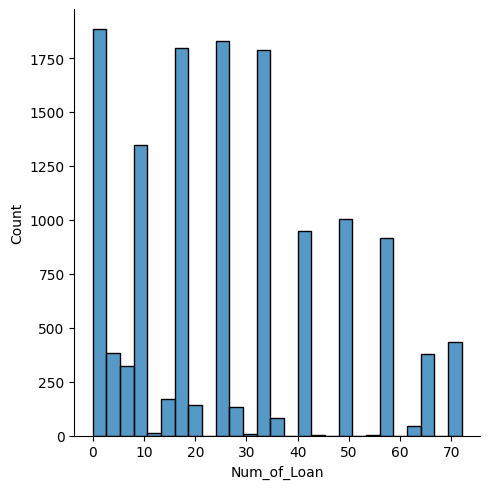

In [187]:
sns.displot(data=data_profile_Income_and_loan, x='Num_of_Loan')

checking num of loans and number of bank accounts

In [189]:
data_profile.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan'],
      dtype='object')

In [190]:
pd.crosstab(index = data_profile.Num_Bank_Accounts,columns = data_profile.Num_of_Loan)

Num_of_Loan,0,1,2,3,4,5,6,7,8,9
Num_Bank_Accounts,,,,,,,,,,
0,936,848,928,960,696,0,0,0,0,0
1,792,1032,912,1008,808,0,0,0,0,0
2,904,720,792,936,976,8,16,0,0,0
3,1984,1832,2256,2424,2344,416,392,456,0,0
4,1872,2048,2488,2352,2240,440,552,400,0,0
5,1896,1760,2192,2288,2592,520,560,480,0,0
6,896,1008,1856,1928,1680,1424,1584,1440,592,776
7,1040,904,1760,1576,1752,1432,1648,1376,720,768
8,1072,968,1760,1560,1768,1456,1392,1560,616,784


the above analysis tells the the number of loans taken according to number of banks

In [192]:
data.Annual_Income.describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [193]:
data.Annual_Income

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

In [195]:
data_box = data[data.Annual_Income < np.percentile(data.Annual_Income,99)]

<Axes: xlabel='Num_Credit_Card', ylabel='Annual_Income'>

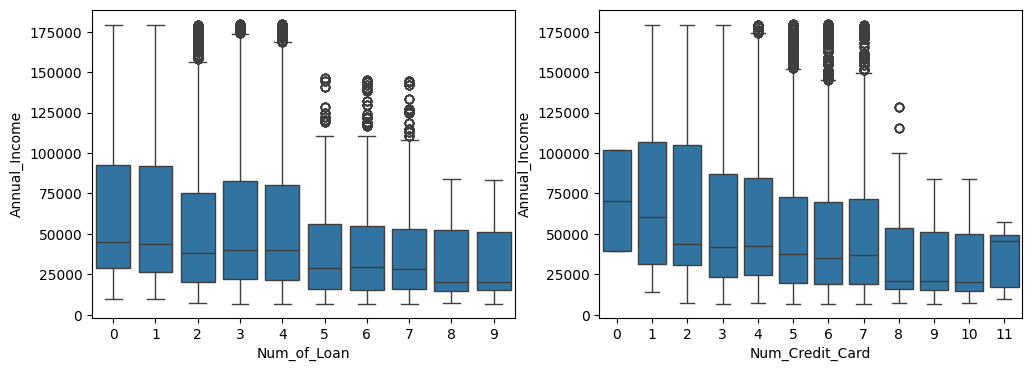

In [198]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.boxplot(x = data_box.Num_of_Loan,y = data_box.Annual_Income)
plt.subplot(1,2,2)
sns.boxplot(x = data_box.Num_Credit_Card,y = data_box.Annual_Income)

<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Annual_Income'>

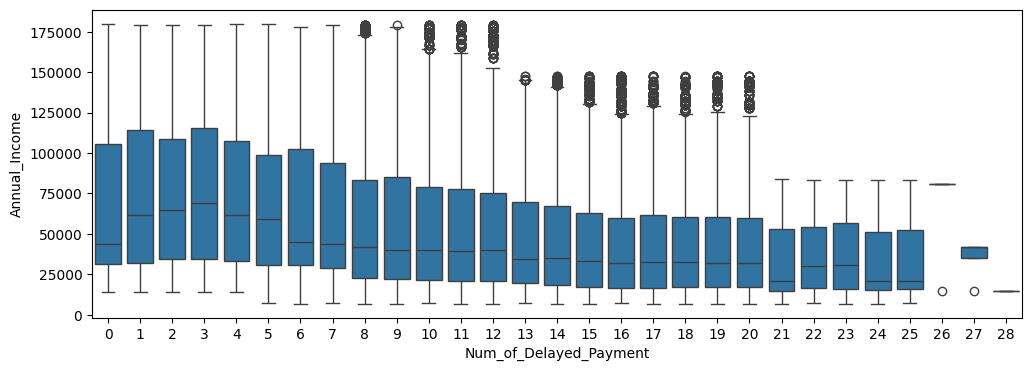

In [199]:
plt.figure(figsize = (12,4))
sns.boxplot(x = data_box.Num_of_Delayed_Payment,y= data_box.Annual_Income)

<Axes: xlabel='Num_of_Delayed_Payment', ylabel='count'>

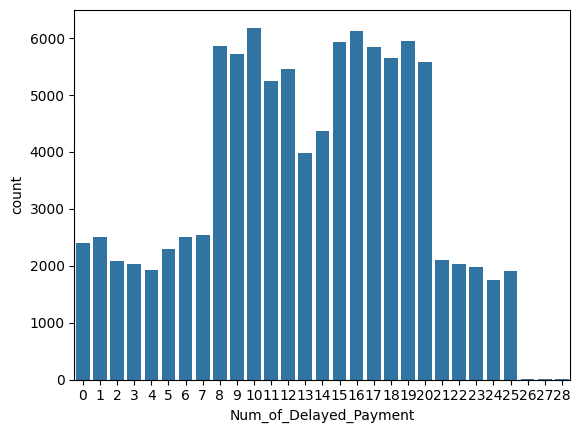

In [201]:
sns.countplot(data = data, x = data.Num_of_Delayed_Payment)

Most of the people have delayed maximum around 8-20 days

<ipython-input-202-717aadc6277b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Credit_History_Age)


<Axes: xlabel='Credit_History_Age', ylabel='Density'>

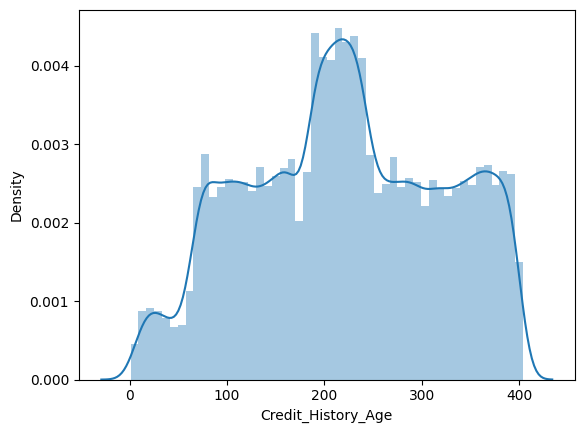

In [202]:
sns.distplot(data.Credit_History_Age)

from above analysis we can say the credit history month is mostly greater than 200 month and less than 250 month

In [203]:
data.Age.unique()

array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 41,
       32, 48, 43, 36, 16, 18, 42, 22, 19, 15, 27, 38, 14, 25, 45, 47, 17,
       53, 24, 54, 29, 49, 51, 50, 52, 56])

In [204]:
pd.crosstab(index = pd.cut(data.Age, bins =[20,30,40,50,60]),columns = data.Num_of_Loan,margins=True)

Num_of_Loan,0,1,2,3,4,5,6,7,8,9,All
Age,,,,,,,,,,,
"(20, 30]",3072,3016,4688,4104,4312,2488,2472,2464,928,1256,28800
"(30, 40]",2888,2976,4408,4584,4448,2344,2504,2352,1224,1264,28992
"(40, 50]",2808,2912,3520,3408,3480,1048,1400,1272,480,552,20880
"(50, 60]",1648,1288,1352,1736,1184,0,0,0,0,0,7208
All,10416,10192,13968,13832,13424,5880,6376,6088,2632,3072,85880


the above analysis shows the distribution of number of loan taken w.r.t to Age of individuals

#Age vs Credit Utilization ratio

for better understanding i had created

bins for credit_utilization ratio : (20, 25] (25, 30] (30, 35] (35, 40] (40, 45] (45, 50]

age: [20,30,40,50,60]

In [205]:
pd.crosstab(index = pd.cut(data.Age, bins =[20,30,40,50,60]),columns = pd.cut(data.Credit_Utilization_Ratio, bins =[20,25,30,35,40,45,50]),margins=True)

Credit_Utilization_Ratio,"(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]",All
Age,,,,,,,
"(20, 30]",2363,8168,8505,8158,1562,44,28800
"(30, 40]",2468,8074,8558,8300,1545,46,28991
"(40, 50]",1704,5830,6171,5867,1269,39,20880
"(50, 60]",516,1890,2193,2047,545,17,7208
All,7051,23962,25427,24372,4921,146,85879


above analysis shows the distribution of credit utilization and Age column the maximum Credit_Utilization_Ratio is shown for people belongingto age within range (30 40] .the credit score inversily relates with Credit_utilization_Ratio

#Deriving Feature for Credit Card Score calculation for individuals

Behavioural Score card


Before proceeding we will store our process data into a new variable name inorder to differentiate between old data and new data

In [206]:
processed_data = data

In [207]:
processed_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

#Feature Engineering

##Outstanding balance

Outstanding balance = amount due-amount paid

In [209]:
processed_data.Outstanding_Debt

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: float64

#Debt to income ratio

outstanding debt/Monthly_Inhand_Salary

or outstanding debt/Annual_Income

In [210]:
processed_data['Debt_to_income_ratio'] = processed_data['Monthly_Inhand_Salary']/processed_data['Outstanding_Debt']

#Number of delayed payment

Represents the average number of payments delayed by a person

##Payment History

###weigh = 40%
This factor evaluates how consistently a borrower has made payments on their debts. A borrower who has always made on-time payments willreceive a higher score than one who has missed payments

###Components that make up payment history:
Payment information on credit cards, retail accounts, installment loans, mortgages and other types of accounts

How overdue delinquent payments
are today or may have become in the past

The amount of money still owed on delinquent accounts or collection items

The number of past due items on a credit report

Adverse public records
(e.g., bankruptcies)

The amount of time that's passed since delinquencies
, adverse public records or collection items were introduced


In [211]:
processed_data['Payment_History'] = processed_data.Num_of_Delayed_Payment

##Amount owed

weigh = 30%

for credit score calculation we will be using Credit_Utilization_Ratio for amount owed

**Credit_Utilization_Ratio:**
The credit utilization ratio is the percentage of a borrower’s total available credit that is currently being used. Highutilization may indicate a higher risk.

##Length of credit history

###weigh = 15%

For this we will use

##Credit History

Credit history is the ongoing documentation of your fi nancial information, including repayment of your debts

This factor evaluates how long a borrower has had credit accounts open. A borrower who has a long history of credit accounts in goodstanding will receive a higher score than one who is new to credit.

In [212]:
processed_data.Credit_History_Age #Represents the age of credit history of the person by month

0        265.0
1        266.0
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

##Types of credit accounts

###weigh = 10%

for this feature, we will use

##Credit mix

This factor evaluates the types of credit accounts a borrower has, such as credit cards, loans, and

In [213]:
processed_data.Credit_Mix

0        Good
1        Good
2        Good
3        Good
4        Good
         ... 
99995    Good
99996    Good
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: object

In [214]:
processed_data.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

since it is categorical so we will enocde it to for standardization

Good = 2

Standard = 1

Bad = 0

In [242]:
processed_data.Credit_Mix.replace({'Good':2, 'Standard':1, 'Bad':0}, inplace =True)

##Recent credit inquiries

###weigh = 10%

This factor evaluates how frequently a borrower has applied for credit. A borrower who has made few recent credit inquiries will receive ahigher score than one who has made many.

In [243]:
processed_data.Num_Credit_Inquiries

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64

#$$-----Credit - Score - Calculation-----$$

In [244]:
credit_data.dtypes

Customer_ID                  object
Payment_History             float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Credit_Mix                   object
Num_Credit_Inquiries        float64
dtype: object

In [266]:
credit_data = processed_data.groupby('Customer_ID').agg({
    'Payment_History':'mean',
    'Credit_Utilization_Ratio':'mean',
    'Credit_History_Age':'max',
    'Credit_Mix':'max',
    'Num_Credit_Inquiries':'sum'
})
credit_data = credit_data.reset_index()

In [267]:
credit_data

,Customer_ID,Payment_History,Credit_Utilization_Ratio,Credit_History_Age,Credit_Mix,Num_Credit_Inquiries
0,CUS_0x1000,24.500,33.477546,129.0,0,87.0
1,CUS_0x1009,17.750,29.839984,372.0,1,16.0
2,CUS_0x100b,7.000,34.841449,190.0,2,8.0
3,CUS_0x1011,14.375,27.655897,190.0,1,56.0
4,CUS_0x1013,8.500,31.933940,214.0,2,24.0
...,...,...,...,...,...,...
12495,CUS_0xff3,8.375,32.889398,207.0,2,34.0
12496,CUS_0xff4,10.000,32.598257,225.0,1,30.0
12497,CUS_0xff6,3.625,33.258053,299.0,2,14.0
12498,CUS_0xffc,15.500,34.722108,157.0,0,99.0


**weigh allotment summary**


Payment_History : 35%

Credit_Utilization_Ratio = 30%

Credit_History_Age : 15 %

credit mix = 10%

credit inquires = 10%

In [268]:
credit_data['credit_scores'] = (
    0.35 * credit_data['Payment_History'] +
    0.30 * credit_data['Credit_Utilization_Ratio'] +
    0.15 * credit_data['Credit_History_Age'] +
    0.10 * credit_data['Credit_Mix'] +
    0.10 * credit_data['Num_Credit_Inquiries']
)

Normalizing the credit score data from 0- 1000

In [269]:
credit_data['credit_scores'] = (
    (credit_data['credit_scores'] - credit_data['credit_scores'].min()) * 1000
) / (credit_data['credit_scores'].max() - credit_data['credit_scores'].min())

In [270]:
credit_data[['Customer_ID', 'credit_scores']]

,Customer_ID,credit_scores
0,CUS_0x1000,427.574384
1,CUS_0x1009,844.987055
2,CUS_0x100b,359.079410
3,CUS_0x1011,441.379179
4,CUS_0x1013,436.998328
...,...,...
12495,CUS_0xff3,440.095456
12496,CUS_0xff4,483.149909
12497,CUS_0xff6,604.645665
12498,CUS_0xffc,469.696922


In [271]:
new_data = data.merge(credit_data, how='left', on='Customer_ID')
new_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_Behaviour,Monthly_Balance,Debt_to_income_ratio,Payment_History_x,Payment_History_y,Credit_Utilization_Ratio_y,Credit_History_Age_y,Credit_Mix_y,Num_Credit_Inquiries_y,credit_scores
0,0x1602,CUS_0xd40,January,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,High_spent_Small_value_payments,312.494089,2.252949,4,4.0,27.160723,271.0,2,32.0,538.846290
1,0x1603,CUS_0xd40,February,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Low_spent_Large_value_payments,284.629163,2.252949,4,4.0,27.160723,271.0,2,32.0,538.846290
2,0x1604,CUS_0xd40,March,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Low_spent_Medium_value_payments,331.209863,2.252949,4,4.0,27.160723,271.0,2,32.0,538.846290
3,0x1605,CUS_0xd40,April,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Low_spent_Small_value_payments,223.451310,2.252949,4,4.0,27.160723,271.0,2,32.0,538.846290
4,0x1606,CUS_0xd40,May,1824.843333,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,High_spent_Medium_value_payments,341.489231,2.252949,4,4.0,27.160723,271.0,2,32.0,538.846290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,3359.415833,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,High_spent_Large_value_payments,479.866228,6.687002,6,6.0,35.720718,382.0,2,24.0,845.817509
99996,0x25fea,CUS_0x942c,May,3359.415833,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,High_spent_Medium_value_payments,496.651610,6.687002,6,6.0,35.720718,382.0,2,24.0,845.817509
99997,0x25feb,CUS_0x942c,June,3359.415833,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,High_spent_Large_value_payments,516.809083,6.687002,6,6.0,35.720718,382.0,2,24.0,845.817509
99998,0x25fec,CUS_0x942c,July,3359.415833,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Low_spent_Large_value_payments,319.164979,6.687002,6,6.0,35.720718,382.0,2,24.0,845.817509


##Observation around credit score

Age-Credit score

<Axes: xlabel='Age', ylabel='credit_scores'>

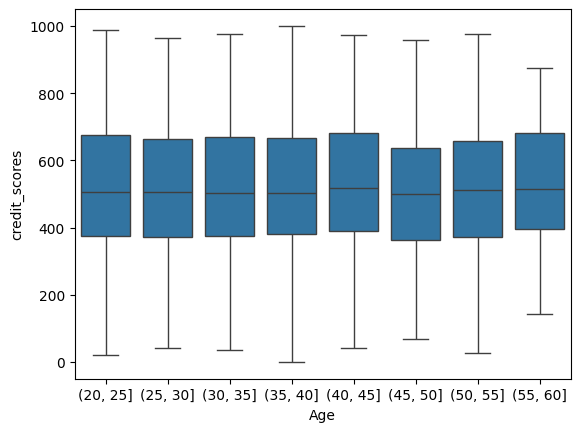

In [272]:
sns.boxplot(x=pd.cut(new_data.Age, bins =[20,25,30,35,40,45,50,55,60]),y=credit_data.credit_scores)

from above observation we can see the credit scores for all the ages lies around 400 -600 0n 1000 scale

<ipython-input-274-614c417d09b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data.credit_scores)


<Axes: xlabel='credit_scores', ylabel='Density'>

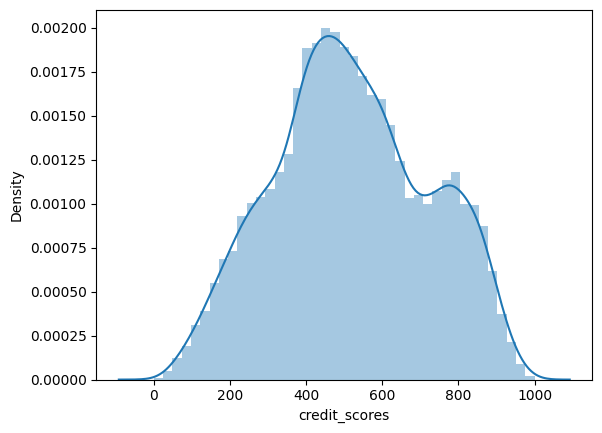

In [274]:
sns.distplot(credit_data.credit_scores)

the credit score distribution for individuals appears normal distribution

##credit mix and credit scores

<Axes: xlabel='Credit_Mix_x', ylabel='credit_scores'>

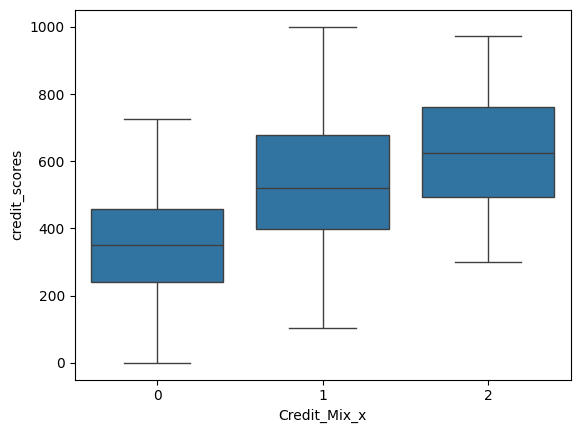

In [278]:
sns.boxplot(x=new_data.Credit_Mix_x, y = new_data.credit_scores)

from above analysis it shows the people with good credit mix(multiple types of loan accounts individual hold) have higher credit scores ascompared to standard and bad credit mix

Num of credit cards and Credit score

<Axes: xlabel='Num_Credit_Card', ylabel='credit_scores'>

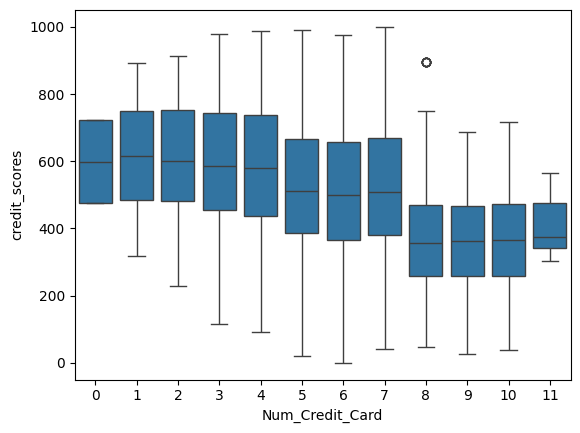

In [281]:
sns.boxplot(x=new_data.Num_Credit_Card, y = new_data.credit_scores)

from above analysis we can say that the people with < 5 credit cards are having gretaer credit score than people with have 5 or more creditcards

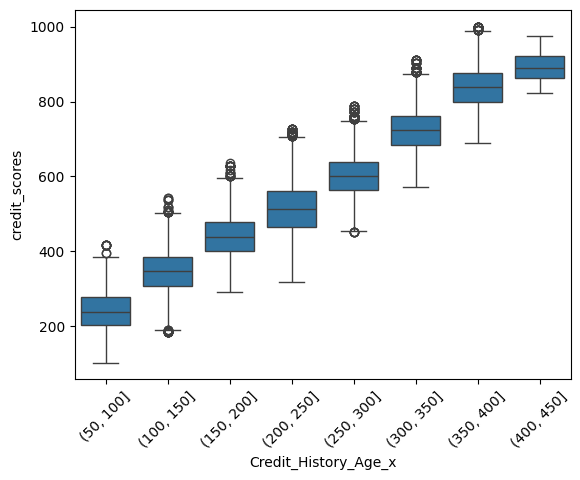

In [282]:
sns.boxplot(x = pd.cut(new_data.Credit_History_Age_x, bins =[50,100,150,200,250,300,350,400,450]), y = new_data.credit_scores)
plt.xticks(rotation =45)
plt.show()

From above graph we can see as the credit history in months of an individuals increase the credit scores also increases which suggest thatpeople who have long credit history is less likely to deafult as they have good credit score

#Payment behaviour and Credit score

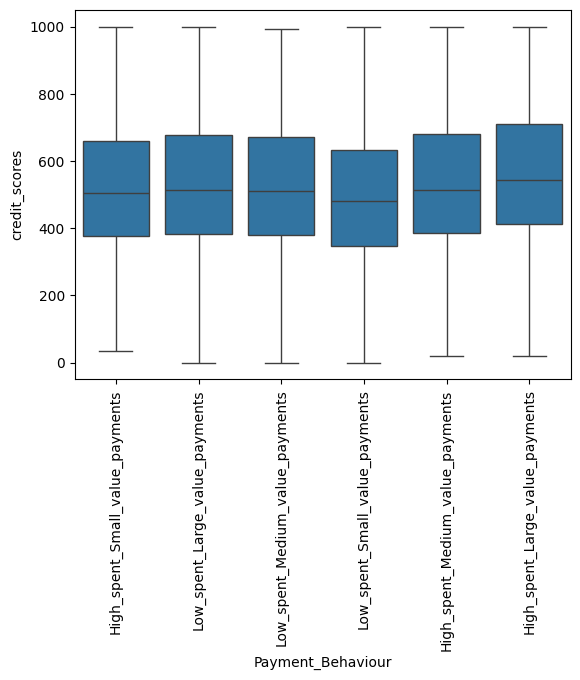

In [285]:
sns.boxplot(x=new_data.Payment_Behaviour, y = new_data.credit_scores)
plt.xticks(rotation = 90)
plt.show()

the above analysis shows the the payment behaviour is less likely effects credit score or we can say there is almost no correlation among eachother